#### Clusterização de Alugueis

In [16]:
# Importação das bibliotecas para analise de dados
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [5]:
db_alugueis = pd.read_csv('historico_alugueis.csv')

## Limpando os dados do data base

In [6]:
#retirnando linhas que contem todos os valores nulos e linhas duplicadas
db_alugueis.dropna(how='all', inplace=True)
db_alugueis = db_alugueis.drop_duplicates()

# Apagando colunas que não serão utilizadas


In [7]:
# Passando por cada coluna para tratar ela da melhor forma
# Utilizando primeiro o display com unique para entender os valores unicos de cada coluna
# Em seguida realizando o tratamento de acordo com o que foi observado
db_alugueis = db_alugueis.applymap(lambda x: x.strip().lower() if isinstance(x, str) else x)
db_alugueis = db_alugueis.applymap(lambda x: x.strip().strip() if isinstance(x, str) else x)

# Tratando a coluna 'ID do aluguel'
db_alugueis['ID do cliente'] = db_alugueis['ID do cliente'].astype(int)

# Tratando a coluna 'tipo de carro alugado'

# Tratando a coluna 'Tempo de aluguel'
db_alugueis['Tempo de aluguel'] = db_alugueis['Tempo de aluguel'].astype(int)

#Data de inicio
import re

# Function to convert months in Portuguese-English mix to standard format
# Modify the function to handle non-string (NaN) values safely

def convert_portuguese_date_format(date_str):
    if isinstance(date_str, str):
        # Mapping English month names to their corresponding numbers
        months_mapping = {
            'january': '01', 'february': '02', 'march': '03', 'april': '04', 'may': '05',
            'june': '06', 'july': '07', 'august': '08', 'september': '09', 'october': '10',
            'november': '11', 'december': '12'
        }

        # Pattern to match the format '6 de january de 2022'
        match = re.match(r'(\d{1,2}) de (\w+) de (\d{4})', date_str)
        if match:
            day, month, year = match.groups()
            month_num = months_mapping.get(month.lower(), None)
            if month_num:
                return f'{day}/{month_num}/{year}'
    return date_str  # Return as is if it's not a match or not a string

db_alugueis['Data de início do aluguel'] = db_alugueis['Data de início do aluguel'].apply(convert_portuguese_date_format)
db_alugueis['Data de início do aluguel'] = pd.to_datetime(db_alugueis['Data de início do aluguel'], dayfirst=True, errors='coerce')

# Tratando a coluna 'Data final do aluguel'    
db_alugueis['Data final do aluguel'] = db_alugueis['Data final do aluguel'].apply(convert_portuguese_date_format)
db_alugueis['Data final do aluguel'] = pd.to_datetime(db_alugueis['Data final do aluguel'], dayfirst=True, errors='coerce')

# Tratando a coluna 'Valor do contrato do aluguel'
def clean_valor_do_contrato(value):
    if isinstance(value, str):
        value = value.lower()
        value = value.replace('r$', '').replace('.', '').replace(',', '.').strip()
    return float(value) if value else None

db_alugueis['Valor do contrato do aluguel'] = db_alugueis['Valor do contrato do aluguel'].apply(clean_valor_do_contrato)

#Tratando a coluna Idade do carro
db_alugueis['Idade do carro'] = db_alugueis['Idade do carro'].astype(int)

# Tratando a coluna Satisfação do cliente
db_alugueis['Satisfação do cliente'] = db_alugueis['Satisfação do cliente'].astype(int)

# Tratando Desconto aplicado no contrato
db_alugueis['Desconto aplicado no contrato'] = db_alugueis['Desconto aplicado no contrato'].apply(clean_valor_do_contrato)

# Criando coluna valor médio do carro por mês
db_alugueis['Valor médio do carro por mês'] = db_alugueis['Valor do contrato do aluguel'] / db_alugueis['Tempo de aluguel']
                              


C:\Users\Patricia\AppData\Local\Temp\ipykernel_15172\2629263365.py:4: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  db_alugueis = db_alugueis.applymap(lambda x: x.strip().lower() if isinstance(x, str) else x)
C:\Users\Patricia\AppData\Local\Temp\ipykernel_15172\2629263365.py:5: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  db_alugueis = db_alugueis.applymap(lambda x: x.strip().strip() if isinstance(x, str) else x)


Agora, iremos apenas fazer algumas alterações no db, para que a conclusão seja mais satisfatória

In [8]:
db_alugueis

,ID do cliente,Tipo do cliente,Tipo de carro alugado,Tempo de aluguel,Data de início do aluguel,Data final do aluguel,Valor do contrato do aluguel,Estado de pagamento,Método de pagamento,Quilometragem do carro,...,Cor do carro,Interações com o suporte,Tipo do problema para contactar o suporte,Satisfação do cliente,Contrato cancelado antes do prazo,Motivo do cancelamento,Desconto aplicado no contrato,Histórico de contratos anteriores,Pagamentos atrasados,Valor médio do carro por mês
0,56367,b2b,sedan,18,2022-01-06,2023-06-30,86040.0,pendente,boleto,64503.0,...,cinza,0.0,NaN,5,não,NaN,14.0,não,sim,4780.0
1,57635,b2c,caminhonete,1,2023-04-22,2023-05-22,8040.0,quitado,boleto,32642.0,...,cinza,0.0,NaN,5,sim,troca de veículo,10.0,não,não,8040.0
2,10730,b2b,sedan,24,2022-06-20,2024-06-09,58272.0,quitado,cartão de crédito,146833.0,...,prata,0.0,NaN,4,não,NaN,13.0,não,sim,2428.0
3,60276,b2c,caminhonete,1,2024-06-28,2024-07-28,6957.0,quitado,cartão de crédito,20257.0,...,prata,2.0,pneu furado,5,não,NaN,2.0,não,não,6957.0
4,58409,b2c,sedan,1,2023-11-07,2023-12-07,4045.0,quitado,boleto,140589.0,...,cinza,1.0,acidente,5,não,NaN,15.0,sim,não,4045.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104659,24396,b2c,suv,1,2023-01-25,2023-02-24,8553.0,quitado,boleto,35884.0,...,cinza,1.0,acidente,1,não,NaN,10.0,não,não,8553.0
104660,34626,b2c,suv,3,2024-08-09,2024-11-07,17370.0,pendente,boleto,100560.0,...,prata,0.0,NaN,5,não,NaN,2.0,não,não,5790.0
104661,41711,b2c,suv,3,2023-07-17,2023-10-15,15483.0,quitado,cartão de crédito,32388.0,...,branco,0.0,NaN,3,não,NaN,17.0,não,não,5161.0
104662,76612,b2c,suv,1,2023-12-01,2023-12-31,9489.0,quitado,boleto,33057.0,...,prata,2.0,bateria descarregada,4,não,NaN,3.0,não,sim,9489.0


##### Agora, podemos iniciar nossa clusterização. Para isso, vamos apenas filtrar as colunas que são de nosso interesse, ou seja, que fazem mais sentido para nossa análise.

##### Objetivo:

Realizar uma clusterização com as seguintes colunas, para compreender quais são os perfis de carros que mais alugados por cada perfil de cliente: 
        'Tipo do cliente', 'Tipo de carro alugado','Quilometragem do carro','Qualidade do carro', 'Tipo de transmissão', 'Combustível', 'Idade do carro', 'Marca do carro'


In [9]:
db_interesse = db_alugueis.copy()

In [10]:
db_interesse = db_interesse.loc[:,['Tipo do cliente', 'Tipo de carro alugado','Qualidade do carro', 'Tipo de transmissão', 'Combustível', 'Idade do carro', 'Marca do carro']]

In [11]:
db_interesse.head(1)

,Tipo do cliente,Tipo de carro alugado,Qualidade do carro,Tipo de transmissão,Combustível,Idade do carro,Marca do carro
0,b2b,sedan,bom,automático,diesel,7,honda


In [27]:
valores_k =range(1,15)
inercias = []


X = pd.get_dummies(db_interesse, dtype=float)
display(X)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


for  i in range(1,15):
    kmeans = KMeans(n_clusters=i, random_state=42).fit(X)
    print(kmeans.inertia_)
    inercias.append(kmeans.inertia_)

,Idade do carro,Tipo do cliente_b2b,Tipo do cliente_b2c,Tipo de carro alugado_caminhonete,Tipo de carro alugado_outro,Tipo de carro alugado_sedan,Tipo de carro alugado_suv,Qualidade do carro_bom,Qualidade do carro_excelente,Qualidade do carro_regular,...,Tipo de transmissão_manual,Combustível_diesel,Combustível_elétrico,Combustível_gasolina comum,Marca do carro_chevrolet,Marca do carro_ford,Marca do carro_honda,Marca do carro_nissan,Marca do carro_toyota,Marca do carro_volkswagen
0,7,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,1,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,5,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
3,5,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104659,2,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
104660,3,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
104661,2,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
104662,5,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


734094.156086226
465064.6424384867
407796.6046425217
393747.25553562597
375131.57600601355
356158.3942232352
341978.01372164336
326675.1473404354
318065.1003141982
306162.5956535369
296318.83049666224
290856.56903644
287414.0234968578
280514.25653999834


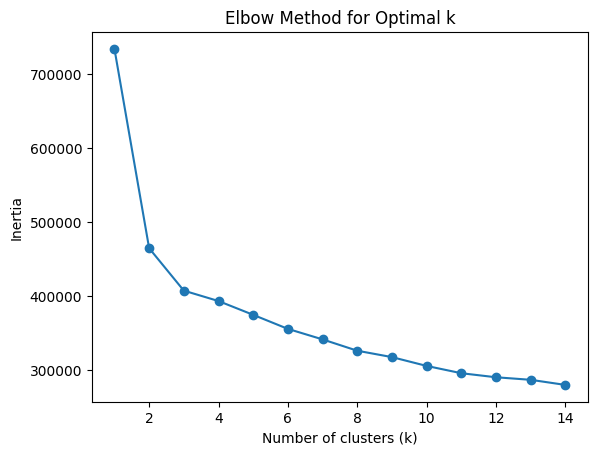

In [22]:
plt.plot(valores_k, inercias, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

Por meio do gráfico de cotovelo, podemos analisar que o melhor número de clusters é o número 3, que é quando a taxa de variação é mínima, e é evidenciado por meio dessa "quebra" da continuídade do gráfico, deixando com um formato de cotovelo. Assim, podemos fazer a análise.

Para melhorar ainda a garantia do numero de clusters, vamos fazer o sihlhouett score, que basicamente calcula o quanto que o cluster está próximo do cluster central e o quanto o cluster está distante de outros clusters. Vamos testar com o mesmo número de clusters do gráfico de cotovelo, dessa forma vamos analisar se foi feita uma boa métrica.

In [23]:
db_interesse

,Tipo do cliente,Tipo de carro alugado,Qualidade do carro,Tipo de transmissão,Combustível,Idade do carro,Marca do carro
0,b2b,sedan,bom,automático,diesel,7,honda
1,b2c,caminhonete,bom,manual,diesel,1,ford
2,b2b,sedan,bom,manual,gasolina comum,5,honda
3,b2c,caminhonete,regular,automático,diesel,5,ford
4,b2c,sedan,excelente,automático,diesel,1,toyota
...,...,...,...,...,...,...,...
104659,b2c,suv,bom,automático,gasolina comum,2,volkswagen
104660,b2c,suv,bom,automático,gasolina comum,3,volkswagen
104661,b2c,suv,excelente,manual,gasolina comum,2,nissan
104662,b2c,suv,regular,automático,gasolina comum,5,volkswagen


In [25]:
#Refazendo a clusterização com 3 clusters, temos: 
#samples = rows
#sempre usar o random state quando eu quiser que o mesmo tipo de data set seja gerado quando o codigo for executado para que os resultados sejam os mesmos sempre que a celula for executada.
#X, _ = make_blobs(n_samples=104564, n_features=7, random_state=423453) codigo usado apenas para entender o padrao aleatorio da geracao
kmeans = KMeans(n_clusters=3,random_state=423453)
labels = kmeans.fit_predict(X_scaled)
#retorna as coordenadas dos pontos de dados no feature space, vai ter a dimensao da nossa tabela, ao passar os parametros corretamente.
silhouette_score(X_scaled, labels)



np.float64(0.19647181025906255)

Por meio do codigo acima, temos noção que nossa clusterização tem bom indicio de estar boa. Agora vamos adicionar os clusters no nosso db principal para fazer uma analise exploratoria e colocar a coluna de id tambem, para que seja possivel tirar conclusoes sobre o cliente especifico em si.

In [ ]:
db_interesse['Clusters'] = X

In [14]:
# Dividing 'Valor do contrato do aluguel' by 'Tempo de aluguel' to get 'Valor médio do carro por mês'
db_alugueis['Valor médio do carro por mês'] = db_alugueis['Valor do contrato do aluguel'] / db_alugueis['Tempo de aluguel']
